<a href="https://colab.research.google.com/github/Akramuddin2303A510F6/RL_B_11-10F6/blob/main/Assignment_3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converged after 10 iterations
Value Function V(s) for γ = 0.9:
[[  3.8706101   5.411789  -18.1         9.0269     11.141    ]
 [  5.411789    7.12421   -19.         11.141      13.49     ]
 [  7.12421     9.0269    -10.         13.49       16.1      ]
 [  9.0269     11.141      13.49       16.1        19.       ]
 [ 11.141      13.49       16.1        19.         10.       ]]


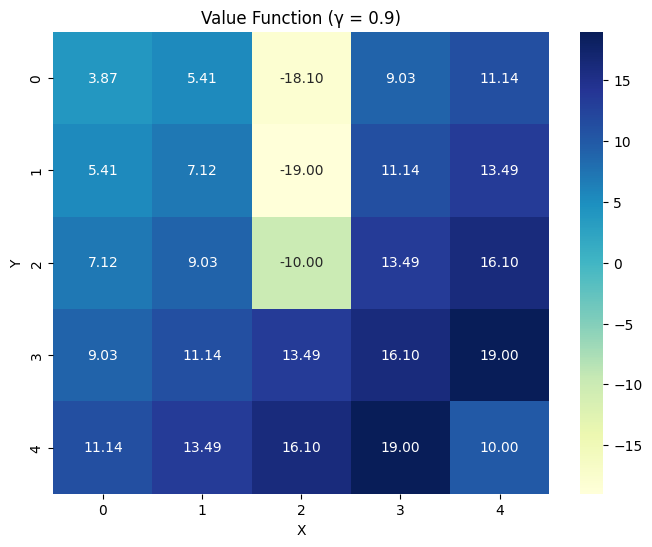


Value Function with γ = 0.5:
[[ -1.8671875  -1.734375   -8.5        -0.9375      0.125    ]
 [ -1.734375   -1.46875   -15.          0.125       2.25     ]
 [ -1.46875    -0.9375    -10.          2.25        6.5      ]
 [ -0.9375      0.125       2.25        6.5        15.       ]
 [  0.125       2.25        6.5        15.         10.       ]]


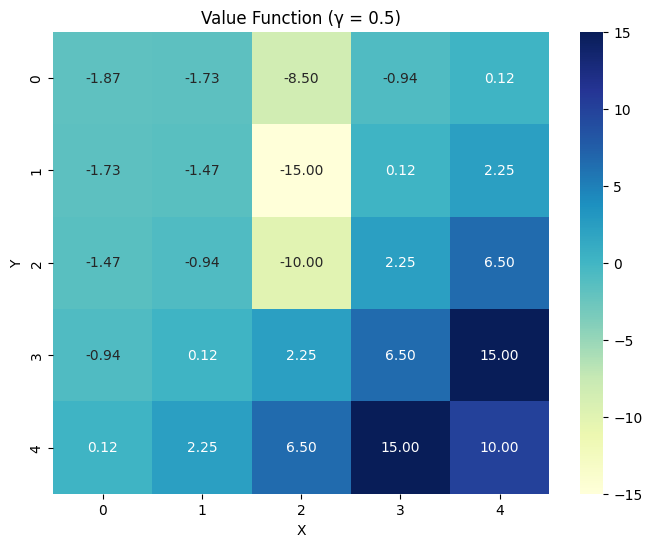


Value Function with γ = 0.9:
[[  3.8706101   5.411789  -18.1         9.0269     11.141    ]
 [  5.411789    7.12421   -19.         11.141      13.49     ]
 [  7.12421     9.0269    -10.         13.49       16.1      ]
 [  9.0269     11.141      13.49       16.1        19.       ]
 [ 11.141      13.49       16.1        19.         10.       ]]


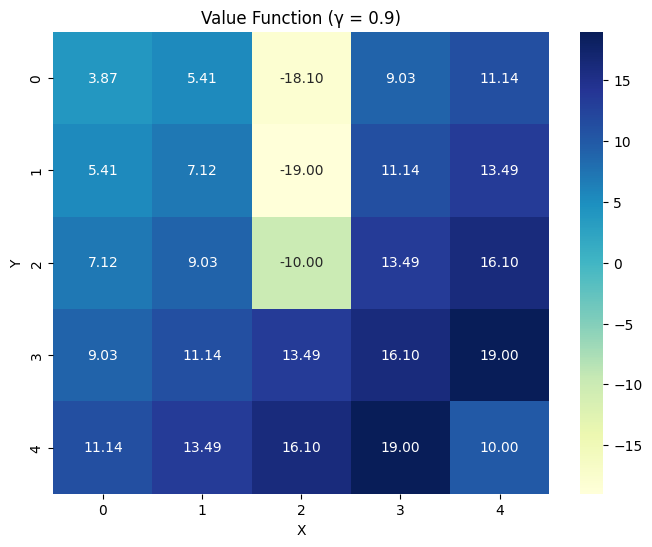


Value Function with γ = 0.99:
[[ 11.75463521  12.88346991 -20.701       15.1754616   16.3388501 ]
 [ 12.88346991  14.02370698 -19.9         16.3388501   17.51399   ]
 [ 14.02370698  15.1754616  -10.          17.51399     18.701     ]
 [ 15.1754616   16.3388501   17.51399     18.701       19.9       ]
 [ 16.3388501   17.51399     18.701       19.9         10.        ]]


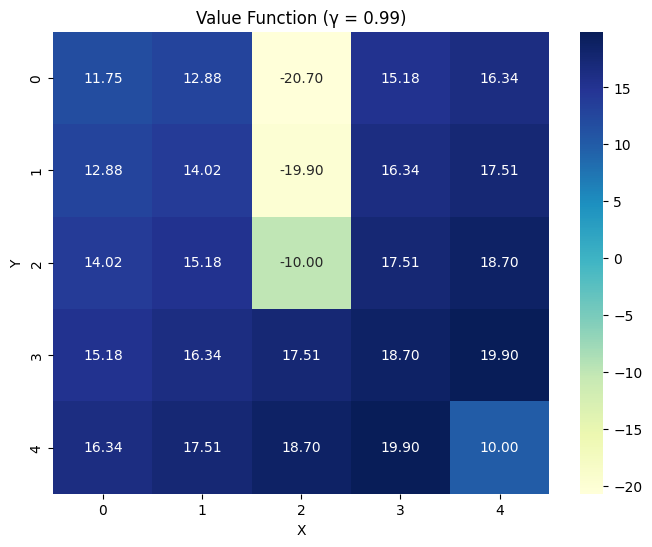

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GridWorld parameters
GRID_SIZE = 5
START = (0, 0)
GOAL = (4, 4)
PIT = (2, 2)
REWARDS = {GOAL: 10, PIT: -10}
DEFAULT_REWARD = -1
GAMMA = 0.9
THRESHOLD = 1e-4

# Initialize value function
V = np.zeros((GRID_SIZE, GRID_SIZE))

def get_next_state(state, action):
    """Determine next state based on action (deterministic)."""
    x, y = state
    if state in [GOAL, PIT]:  # Terminal states
        return state
    if action == 'Right' and x < GRID_SIZE - 1:
        return (x + 1, y)
    elif action == 'Down' and y < GRID_SIZE - 1:
        return (x, y + 1)
    return (x, y)  # Stay if at boundary or action not applicable

def policy(state):
    """Fixed policy: Right if possible, else Down."""
    x, y = state
    if state in [GOAL, PIT]:  # Stay at terminal states
        return None
    if x < GRID_SIZE - 1:
        return 'Right'
    elif y < GRID_SIZE - 1:
        return 'Down'
    return None

def compute_value_function(gamma=GAMMA):
    """Iterative policy evaluation to compute V(s)."""
    V_new = np.zeros((GRID_SIZE, GRID_SIZE))
    iteration = 0
    while True:
        delta = 0
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                state = (x, y)
                v = V_new[x, y]
                action = policy(state)
                if action is None:  # Terminal state or no valid action
                    reward = REWARDS.get(state, 0)  # 0 for non-special states unless specified
                    V_new[x, y] = reward
                else:
                    next_state = get_next_state(state, action)
                    reward = REWARDS.get(next_state, DEFAULT_REWARD)
                    V_new[x, y] = reward + gamma * V_new[next_state[0], next_state[1]]
                delta = max(delta, abs(v - V_new[x, y]))
        iteration += 1
        V_new = V_new.copy()  # Ensure we use updated values in next iteration
        if delta < THRESHOLD:
            break
    return V_new, iteration

# Compute and display value function for gamma = 0.9
V, iterations = compute_value_function()
print(f"Converged after {iterations} iterations")
print("Value Function V(s) for γ = 0.9:")
print(V)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(V, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Value Function (γ = 0.9)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Analysis of different gamma values
gamma_values = [0.5, 0.9, 0.99]
for gamma in gamma_values:
    V_gamma, _ = compute_value_function(gamma)
    print(f"\nValue Function with γ = {gamma}:")
    print(V_gamma)
    plt.figure(figsize=(8, 6))
    sns.heatmap(V_gamma, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(f"Value Function (γ = {gamma})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

Value Function V(s):
[[ -0.43   0.63   1.81   3.12   4.58]
 [  0.63   1.81   3.12   4.58   6.2 ]
 [-10.   -10.     0.     6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]
 [  4.58   6.2    8.    10.     0.  ]]


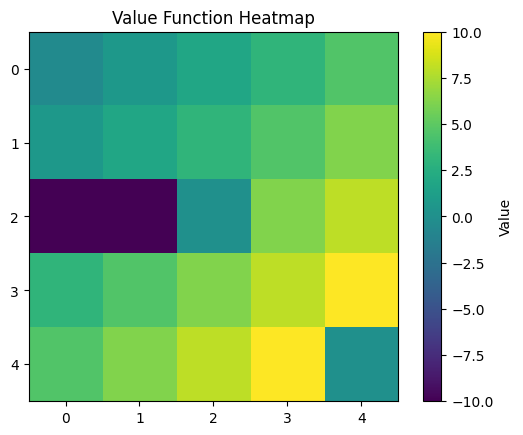

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Grid parameters
N = 5
gamma = 0.9
goal = (4, 4)
pit = (2, 2)

# Rewards
REWARD_GOAL = 10
REWARD_PIT = -10
REWARD_STEP = -1

# Initialize value function
V = np.zeros((N, N))

# Fixed policy: Right if possible, otherwise Down
def policy(state):
    x, y = state
    if y < N - 1:
        return (0, 1)  # Move right
    elif x < N - 1:
        return (1, 0)  # Move down
    else:
        return (0, 0)  # Stay

def is_terminal(state):
    return state == goal or state == pit

# Value iteration for fixed policy
def evaluate_policy(iterations=50):
    global V
    for _ in range(iterations):
        new_V = np.copy(V)
        for i in range(N):
            for j in range(N):
                state = (i, j)
                if is_terminal(state):
                    continue
                dx, dy = policy(state)
                next_state = (i + dx, j + dy)
                next_state = (min(N-1, next_state[0]), min(N-1, next_state[1]))
                if next_state == goal:
                    reward = REWARD_GOAL
                elif next_state == pit:
                    reward = REWARD_PIT
                else:
                    reward = REWARD_STEP
                new_V[i, j] = reward + gamma * V[next_state]
        V = new_V

evaluate_policy()

# Print value function
print("Value Function V(s):")
print(np.round(V, 2))

# Visualization
plt.imshow(V, cmap='viridis')
plt.colorbar(label='Value')
plt.title("Value Function Heatmap")
plt.show()
